In [1]:
"""
Created on Thu Apr 16 17:25:36 2020

@author: maddalena
"""
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import matplotlib.gridspec as gridspec

In [2]:
# The SIR model differential equations.
def deriv(y, t, N, beta,gamma):
    S,I,R = y

    dSdt = -(beta*I/N)*S 
    dIdt = (beta*S/N)*I - gamma*I 
    dRdt = gamma*I 
    
    return dSdt, dIdt, dRdt

In [3]:
#Integration of the differential equations
    
def time_evo(N,beta,gamma,I0=1,R0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N,beta,gamma))
    S, I, R = np.transpose(ret)
    
    return (t,S,I,R)

In [4]:
#Show the result

fin_result=time_evo(1000,0.5,1/14)

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]

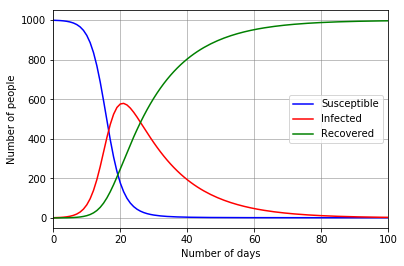

In [5]:
#SIR MODEL PLOT

plt.plot(t, s_vec, 'b', label='Susceptible')
plt.plot(t, i_vec, 'r', label='Infected')
plt.plot(t, r_vec, 'g', label='Recovered')
#plt.plot(t, m_vec, 'k', label='Deaths')
#plt.plot(t, i_vec+r_vec, color='orange',linestyle='--', label='Infected + Recovered')
plt.legend(loc=5)
#plt.yscale('log')
#plt.ylim(0.5,3000)
plt.xlim(0,100)
plt.xlabel('Number of days')
plt.ylabel('Number of people')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
#plt.savefig('plotsir05.png',dpi=300)
plt.show()

In [6]:
#IMPORT FILES WORLD
#i files sono: le righe sono le nazioni, le colonne i giorni del mese (DATE).

file_confirmed='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
file_deaths='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
file_recovered='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

df_confirmed=pd.read_csv(file_confirmed)
df_deaths=pd.read_csv(file_deaths)
df_recovered=pd.read_csv(file_recovered)

In [7]:
#Data manipulation and representation (World)

deaths_world=df_deaths.iloc[:,-1].sum()
recovered_world=df_recovered.iloc[:,-1].sum()
total_world=df_confirmed.iloc[:,-1].sum()

max_death_rate=round(deaths_world/(deaths_world+recovered_world)*100,1)
min_death_rate=round(deaths_world/total_world*100,1)

print('Total contaminated:',total_world)
print('Total deaths:',deaths_world)
print('Total recovered:',recovered_world)

print('Based on the WHO data, the death rate is between',min_death_rate,'% and',max_death_rate,'% of the confirmed case')

Total contaminated: 6166946
Total deaths: 372035
Total recovered: 2641329
Based on the WHO data, the death rate is between 6.0 % and 12.3 % of the confirmed case


In [8]:
def mortality_rate(f_asympt):
    recovered_tot=recovered_world+f_asympt*total_world
    return deaths_world/(deaths_world+recovered_tot)

print(mortality_rate(1)*100)
print(mortality_rate(2)*100)

f_asympt_grid=np.arange(0,2.5,0.1)

4.05253199510692
2.424114121768738


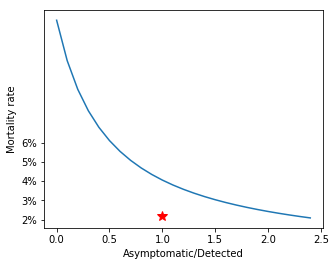

In [9]:
plt.figure(figsize=(5,4))
plt.plot(f_asympt_grid,mortality_rate(f_asympt_grid)*100)
plt.xlabel('Asymptomatic/Detected')
plt.ylabel('Mortality rate')
plt.yticks([1,2,3,4,5,6],['1%','2%','3%','4%','5%','6%'])
plt.plot(1,2.2,marker='*',color='red',markersize=11)
#plt.savefig('mortality_rate_plot.png',dpi=300)
plt.show()

In [10]:
def func_plot(df):
    y_world=[]
    n_cols=df.shape[1]
    #print(n_cols)
    for i in range(n_cols-4):
        y_world.append(df.iloc[:,i+4].sum())
    
    x_world2=df.columns[4:]
    x_world=pd.to_datetime(x_world2,infer_datetime_format=False)
    
    return (x_world,y_world)

peppe=func_plot(df_confirmed)

In [11]:
######## INPUT PARAMETERS ########
country='Italy'
t0=pd.to_datetime('2020-01-22')
#################################

mask_coun=df_confirmed['Country/Region']==country   # you can change the country here
mask_coun_rec=df_recovered['Country/Region']==country

df_confirmed_coun=df_confirmed.loc[mask_coun,:]
df_deaths_coun=df_deaths.loc[mask_coun,:]
df_recovered_coun=df_recovered.loc[mask_coun_rec,:]

#somma tutte le ultime colonne (cioè valori dell'ultimo giorno) 
#dei 3 files, deaths, recovered, confirmed, per avere il TOT mondiale 
deaths_world_coun=df_deaths_coun.iloc[:,-1].sum()
recovered_world_coun=df_recovered_coun.iloc[:,-1].sum()
total_world_coun=df_confirmed_coun.iloc[:,-1].sum()

max_death_rate_coun=round(deaths_world_coun/(deaths_world_coun+recovered_world_coun)*100,1)
min_death_rate_coun=round(deaths_world_coun/total_world_coun*100,1)

print('Total contaminated:',country,total_world_coun)
print('Total deaths',country,deaths_world_coun)
print('Total recovered ',country,recovered_world_coun)

print('Based on the WHO data, the death rate in',country,'is between',min_death_rate_coun,'% and',max_death_rate_coun,'% of the total confirmed case')

Total contaminated: Italy 232997
Total deaths Italy 33415
Total recovered  Italy 157507
Based on the WHO data, the death rate in Italy is between 14.3 % and 17.5 % of the total confirmed case


/Users/luigigiuseppeatzeni/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


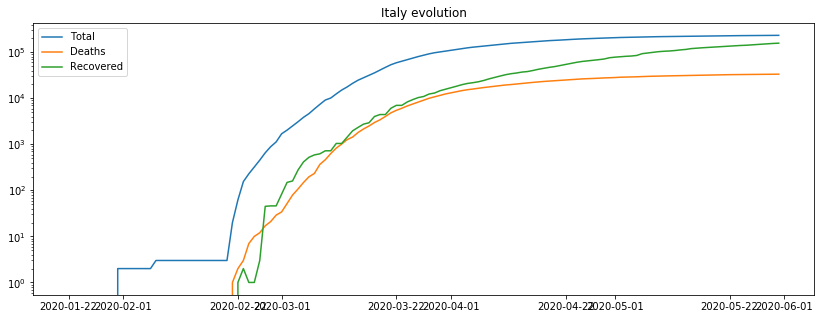

In [12]:
plt.figure(figsize=(14,5))
plt.plot(func_plot(df_confirmed_coun)[0],func_plot(df_confirmed_coun)[1],label='Total')
plt.plot(func_plot(df_deaths_coun)[0],func_plot(df_deaths_coun)[1],label='Deaths')
plt.plot(func_plot(df_recovered_coun)[0],func_plot(df_recovered_coun)[1],label='Recovered')
plt.legend()
plt.yscale('log')
plt.title(country+' evolution')
#plt.savefig('country_plot.png',dpi=300)
plt.show()

In [13]:
ytot=np.array(func_plot(df_confirmed_coun)[1])
ydeaths=np.array(func_plot(df_deaths_coun)[1])
yrec=np.array(func_plot(df_recovered_coun)[1])

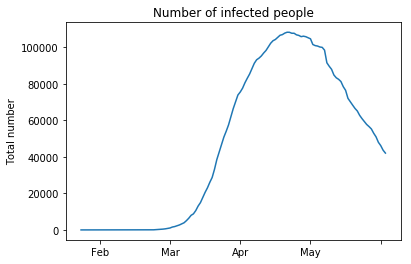

In [14]:
plt.plot(ytot-ydeaths-yrec)
#plt.yscale('log')
plt.xticks(np.arange(8,130,30),['Feb','Mar','Apr','May'])
plt.ylabel('Total number')
plt.title('Number of infected people')
#plt.savefig('activegermany.png',dpi=300)
plt.show()

In [15]:
#Generalization to other countries

def whichcountry(name):
        
    ######## INPUT PARAMETERS ########
    country=name
    t0=pd.to_datetime('2020-01-22')
    #################################

    mask_coun=df_confirmed['Country/Region']==country   # you can change the country here
    mask_coun_rec=df_recovered['Country/Region']==country

    df_confirmed_C=df_confirmed.loc[mask_coun,:]
    df_deaths_C=df_deaths.loc[mask_coun,:]
    df_recovered_C=df_recovered.loc[mask_coun_rec,:]

    ytot=np.array(func_plot(df_confirmed_C)[1])
    ydeaths=np.array(func_plot(df_deaths_C)[1])
    yrec=np.array(func_plot(df_recovered_C)[1])

    return ytot-ydeaths-yrec, ytot[-1], yrec[-1],ydeaths[-1]

In [16]:
print(whichcountry('Italy')[0])#confirmed last day
print(whichcountry('Italy')[2])#recovered last day

[     0      0      0      0      0      0      0      0      0      2
      2      2      2      2      2      2      3      3      3      3
      3      3      3      3      3      3      3      3      3      3
     19     59    150    221    311    438    593    821   1053   1577
   1835   2263   2706   3296   3916   5061   6387   7985   8794  10590
  13052  14955  17750  20603  23073  26062  28710  33190  38549  42681
  46638  50826  54030  57521  62013  66414  70065  73880  75528  77635
  80572  83049  85388  88274  91246  93187  94067  95262  96877  98273
 100269 102253 103616 104291 105418 106607 106962 107771 108257 108237
 107709 107699 106848 106527 105847 106103 105813 105205 104657 101551
 100943 100704 100179  99980  98467  91528  89624  87961  84842  83324
  82488  81266  78457  76440  72070  70187  68351  66553  65129  62752
  60960  59322  57752  56594  55300  52942  50966  47986  46175  43691
  42075]
157507


In [17]:
#definition of time
df_time=pd.to_datetime(np.arange(len(ytot)),unit='D',origin=pd.Timestamp('2020-01-22'))

# list of top countries , with the higher number of cases

df_nofcases=pd.DataFrame(np.array(df_confirmed.iloc[:,1]))
df_nofcases.columns=['Country']
df_nofcases['Confirmed']=df_confirmed.iloc[:,-1]

df_nofcases
#np.array(df_nofcases.sort_values(by='Confirmed',ascending=False).head(6)['Country'])

,Country,Confirmed
0,Afghanistan,15205
1,Albania,1137
2,Algeria,9394
3,Andorra,764
4,Angola,86
5,Antigua and Barbuda,26
6,Argentina,16851
7,Armenia,9282
8,Australia,107
9,Australia,3098


In [18]:
countries_list=['Albania',
                'Armenia',
                'Austria',
                'Azerbaijan',
                'Belarus',
                'Belgium',
                'Bosnia and Herzegovina',
                'Bulgaria',
                'Cyprus',
                'Croatia',
                'Czechia',
                'Denmark',
                'Estonia',
                'Finland',
                'France',
                'Georgia',
                'Germany',
                'Greece',
                'Hungary',
                'Iceland',
                'Ireland',
                'Israel',
                'Italy',
                'Kazakhstan',
                'Kyrgyzstan',
                'Latvia',
                'Lithuania',
                'Luxembourg',
                'Malta',
                'Moldova',
                'Monaco',
                'Montenegro',
                'Netherlands',
                'North Macedonia',
                'Norway',
                'Poland',
                'Portugal',
                'Romania',
                'Serbia',
                'Slovakia',
                'Slovenia',
                'Spain',
                'Sweden',
                'Switzerland',
                'Turkey',
                'Ukraine',
                'United Kingdom']

In [19]:
df_active=pd.DataFrame(whichcountry(countries_list[0])[0])
df_active.columns=[countries_list[0]]
df_active.index=df_time

for i in range(0,len(countries_list)):
    df_active[countries_list[i]]=whichcountry(countries_list[i])[0]

df_active.columns=['Albania',
                'Armenia',
                'Austria',
                'Azerbaijan',
                'Belarus',
                'Belgium',
                'Bosnia and Herzegovina',
                'Bulgaria',
                'Cyprus',
                'Croatia',
                'Czechia',
                'Denmark',
                'Estonia',
                'Finland',
                'France',
                'Georgia',
                'Germany',
                'Greece',
                'Hungary',
                'Iceland',
                'Ireland',
                'Israel',
                'Italy',
                'Kazakhstan',
                'Kyrgyzstan',
                'Latvia',
                'Lithuania',
                'Luxembourg',
                'Malta',
                'Moldova',
                'Monaco',
                'Montenegro',
                'Netherlands',
                'North Macedonia',
                'Norway',
                'Poland',
                'Portugal',
                'Romania',
                'Serbia',
                'Slovakia',
                'Slovenia',
                'Spain',
                'Sweden',
                'Switzerland',
                'Turkey',
                'Ukraine',
                'United Kingdom']
print(df_active[-1:])

            Albania  Armenia  Austria  Azerbaijan  Belarus  Belgium  \
2020-05-31      232     5765      470        2003    23807    33027   

            Bosnia and Herzegovina  Bulgaria  Cyprus  Croatia  ...  Romania  \
2020-05-31                     495      1299     137       71  ...     4735   

            Serbia  Slovakia  Slovenia  Spain  Sweden  Switzerland  Turkey  \
2020-05-31    4471       127         7  61976   28176          442   31429   

            Ukraine  United Kingdom  
2020-05-31    13426          236395  

[1 rows x 47 columns]


In [20]:
print(df_active['Germany'])

2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
2020-01-27        1
2020-01-28        4
2020-01-29        4
2020-01-30        4
2020-01-31        5
2020-02-01        8
2020-02-02       10
2020-02-03       12
2020-02-04       12
2020-02-05       12
2020-02-06       12
2020-02-07       13
2020-02-08       13
2020-02-09       14
2020-02-10       14
2020-02-11       16
2020-02-12       16
2020-02-13       15
2020-02-14       15
2020-02-15       15
2020-02-16       15
2020-02-17       15
2020-02-18        4
2020-02-19        4
2020-02-20        4
              ...  
2020-05-02    29155
2020-05-03    28198
2020-05-04    26459
2020-05-05    24914
2020-05-06    20987
2020-05-07    20338
2020-05-08    21378
2020-05-09    20475
2020-05-10    19910
2020-05-11    19298
2020-05-12    18233
2020-05-13    17537
2020-05-14    16294
2020-05-15    15739
2020-05-16    15214
2020-05-17    14396
2020-05-18    13507
2020-05-19    14016
2020-05-20    13363


In [21]:
df_active.to_csv('active_infected',index=True)

In [22]:
data = pd.read_csv('active_infected')
#print(data['Italy'])

In [23]:
xdata=pd.to_numeric(range(data.shape[0]))
print(xdata)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130]


In [24]:
n_countries = len(countries_list)

In [25]:
today=len(xdata)

In [26]:
array_country=whichcountry('Italy')[0]

def minimizer(R0,t1=today-5,t2=today):
    array_country_bis=array_country
    
    #true data
    ydata_inf_2=array_country[t1:t2]
    xdata_2=np.arange(0,len(ydata_inf_2))
    
    #model
    fin_result=time_evo(60*10**6,1/14*R0,1/14,I0=ydata_inf_2[0])
    i_vec=fin_result[2]
    i_vec_2=i_vec[0:len(xdata_2)]
    
    #average error
    error=np.sum(np.abs(ydata_inf_2-i_vec_2)/ydata_inf_2)*100
    return error

minimizer_vec=np.vectorize(minimizer)

In [27]:
#definition of the ideal r0

xgrid=np.arange(0.01,1.3,0.01)
ygrid=minimizer_vec(xgrid)#calcola per la prima
r0_ideal=round(xgrid[np.argmin(ygrid)],2)

In [28]:
#time(minimizer_vec(xgrid))

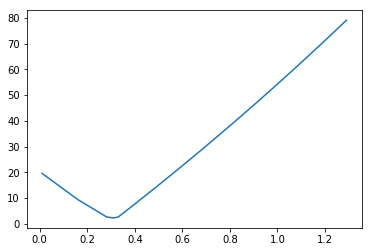

0.31


In [29]:
plt.plot(xgrid,ygrid)
plt.show()
print(r0_ideal)

In [30]:
time_window=5

def minimizer_gen(t1,t2,xgrid=np.arange(0.1,5,0.01)):

    ygrid=minimizer_vec(xgrid,t1=t1,t2=t2)
    r0_ideal=round(xgrid[np.argmin(ygrid)],2)

    return r0_ideal

In [31]:
print(whichcountry(countries_list[0])[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   2  10  11  22  32  37  41
  50  54  57  62  68  72  85  98 108 124 151 147 156 169 168 176 177 185
 198 214 237 240 230 224 221 211 213 206 212 203 218 215 230 220 222 231
 238 251 251 257 282 288 286 289 281 272 263 239 233 229 219 206 206 199
 198 187 187 163 161 173 180 188 200 190 176 175 167 173 175 177 177 193
 205 220 215 232 232]


In [32]:
r0_time=[]
scangrid=np.linspace(0,5,100)
array_country=whichcountry(countries_list[0])[0] #inizializzo

for name in range(0, len(countries_list)):
    print(countries_list[name],array_country)
    
    for i in range(0,today-(time_window-1)):
        min_val=minimizer_gen(i,i+time_window,scangrid)
        r0_time.append(min_val)
        scangrid=np.linspace(0,min_val+5,200)
        print(i,min_val)
        
    array_country=whichcountry(countries_list[name+1])[0]

Albania [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   2  10  11  22  32  37  41
  50  54  57  62  68  72  85  98 108 124 151 147 156 169 168 176 177 185
 198 214 237 240 230 224 221 211 213 206 212 203 218 215 230 220 222 231
 238 251 251 257 282 288 286 289 281 272 263 239 233 229 219 206 206 199
 198 187 187 163 161 173 180 188 200 190 176 175 167 173 175 177 177 193
 205 220 215 232 232]
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0


/Users/luigigiuseppeatzeni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 5.0
48 5.58
49 6.49
50 3.93
51 2.83
52 2.52
53 2.53
54 2.01
55 2.01
56 2.22
57 2.47
58 2.63
59 2.91
60 2.78
61 2.42
62 2.42
63 2.09
64 1.39
65 1.64
66 1.5
67 1.27
68 1.45
69 1.56
70 1.88
71 1.97
72 1.89
73 1.32
74 0.76
75 0.55
76 0.73
77 0.72
78 0.75
79 0.87
80 0.97
81 1.17
82 1.18
83 1.4
84 1.06
85 1.19
86 1.03
87 1.36
88 1.5
89 1.37
90 1.38
91 1.47
92 1.46
93 1.49
94 1.11
95 0.89
96 0.77
97 0.55
98 0.33
99 0.29
100 0.35
101 0.59
102 0.56
103 0.5
104 0.58
105 0.76
106 0.67
107 0.57
108 0.28
109 0.32
110 0.64
111 1.47
112 1.76
113 1.56
114 1.25
115 0.75
116 0.38
117 0.43
118 0.93
119 1.01
120 1.27
121 1.17
122 1.46
123 1.69
124 2.02
125 1.66
126 1.44
Armenia [   0    0    0    0    0    0    0    0    0    0    0    0    0    0


4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 1.01
14 1.0
15 0.99
16 0.99
17 0.99
18 0.99
19 0.99
20 0.99
21 0.99
22

/Users/luigigiuseppeatzeni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 5.0
40 10.0
41 10.25
42 8.81
43 7.36
44 4.66
45 3.16
46 3.03
47 2.82
48 4.28
49 4.66
50 5.87
51 3.93
52 3.72
53 3.37
54 3.36
55 3.44
56 3.65
57 3.48
58 2.81
59 2.86
60 2.49
61 3.09
62 3.58
63 3.66
64 3.18
65 3.21
66 2.35
67 1.96
68 1.85
69 1.96
70 2.03
71 1.94
72 1.81
73 1.61
74 1.63
75 1.6
76 1.56
77 1.62
78 1.53
79 1.44
80 1.49
81 1.47
82 1.5
83 1.63
84 1.3
85 1.36
86 1.41
87 1.42
88 1.39
89 1.28
90 1.26
91 1.29
92 1.3
93 1.2
94 1.15
95 1.14
96 1.11
97 1.07
98 1.07
99 1.07
100 1.07
101 1.07
102 1.04
103 1.03
104 1.03
105 1.12
106 1.11
107 1.11
108 1.07
109 1.07
110 1.04
111 1.0
112 1.06
113 1.07
114 1.07
115 1.07
116 1.07
117 1.04
118 1.03
119 1.06
120 1.07
121 1.07
122 1.04
123 1.03
124 1.03
125 1.03
126 1.03
Bosnia and Herzegovina [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 5.0
40 7.44
41 6.94
42 5.76
43 4.33
44 3.84
45 4.58
46 4.86
47 6.29
48 6.75
49 4.43
50 5.59
51 4.58
52 4.14
53 4.09
54 4.61
55 4.25
56 4.56
57 3.22
58 2.81
59 2.59
60 2.82
61 3.07
62 3.24
63 3.15
64 2.78
65 2.27
66 1.94
67 2.02
68 2.05
69 2.02
70 2.05
71 1.77
72 1.7
73 1.45
74 1.56
75 1.48
76 1.47
77 1.3
78 1.17
79 1.09
80 1.01
81 0.91
82 0.86
83 0.91
84 0.98
85 0.9
86 0.95
87 0.9
88 0.71
89 0.69
90 0.63
91 0.76
92 0.69
93 0.71
94 0.63
95 0.59
96 0.76
97 0.75
98 0.75
99 0.78
100 0.58
101 0.5
102 0.44
103 0.52
104 0.69
105 0.83
106 0.97
107 0.69
108 0.51
109 0.36
110 0.43
111 0.49
112 0.69
113 0.8
114 0.87
115 0.8
116 0.76
117 0.78
118 0.76
119 0.9
120 0.98
121 1.05
122 0.85
123 0.71
124 0.75
125 0.84
126 0.94
Denmark [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    1    1    3    4    4    6
 

19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 1.01
36 4.83
37 4.84
38 4.85
39 0.99
40 2.02
41 2.01
42 2.99
43 1.0
44 5.64
45 7.27
46 3.14
47 2.82
48 3.42
49 2.03
50 2.01
51 2.15
52 1.47
53 1.53
54 1.94
55 2.2
56 2.13
57 2.36
58 2.37
59 2.07
60 2.13
61 1.72
62 1.76
63 1.43
64 1.68
65 1.88
66 1.73
67 2.37
68 2.22
69 2.21
70 2.32
71 2.06
72 1.53
73 1.8
74 1.67
75 1.51
76 1.77
77 1.6
78 1.63
79 1.6
80 1.89
81 2.25
82 2.26
83 1.97
84 2.17
85 1.44
86 1.23
87 1.1
88 1.13
89 1.05
90 1.03
91 1.12
92 1.29
93 1.33
94 1.37
95 1.15
96 1.17
97 1.24
98 1.38
99 1.12
100 1.11
101 0.68
102 0.74
103 0.61
104 0.59
105 0.81
106 0.76
107 0.75
108 0.4
109 0.22
110 0.39
111 0.62
112 0.93
113 0.74
114 0.63
115 0.74
116 0.49
117 0.36
118 0.51
119 0.58
120 0.45
121 0.41
122 0.24
123 0.21
124 0.0
125 0.18
126 0.65
Germany [    0     0     0     0     0     1     4     4     4     5     8    10
    12    12    12    12    13    13    14    14    

4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 1.01
39 6.01
40 10.73
41 8.69
42 5.02
43 5.69
44 1.72
45 3.95
46 3.78
47 5.87
48 5.46
49 4.89
50 6.16
51 3.98
52 3.47
53 4.77
54 5.89
55 5.53
56 5.66
57 3.43
58 3.35
59 3.44
60 3.56
61 3.23
62 3.14
63 2.99
64 2.65
65 2.42
66 2.24
67 2.33
68 2.28
69 2.19
70 2.31
71 2.17
72 1.98
73 1.96
74 1.92
75 1.91
76 2.57
77 2.66
78 2.81
79 2.24
80 2.18
81 2.2
82 1.99
83 1.9
84 1.73
85 1.62
86 0.0
87 0.0
88 0.0
89 0.0
90 2.24
91 2.04
92 1.73
93 1.62
94 0.23
95 0.0
96 0.0
97 0.0
98 1.63
99 1.57
100 1.62
101 0.0
102 0.0
103 0.0
104 0.0
105 1.53
106 1.58
107 1.59
108 0.0
109 0.0
110 0.0
111 0.0
112 2.04
113 1.38
114 1.31
115 0.0
116 0.0
117 0.0
118 0.0
119 1.56
120 1.55
121 1.42
122 0.0
123 0.0
124 0.0
125 0.0
126 1.43
Israel [   0    0    0    0    0    0    0    0    0 

10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 1.01
41 1.0
42 0.99
43 1.02
44 6.02
45 8.86
46 6.27
47 3.79
48 4.86
49 5.1
50 6.45
51 4.83
52 4.05
53 4.78
54 5.41
55 4.86
56 3.62
57 3.6
58 3.03
59 3.07
60 3.16
61 2.46
62 2.55
63 2.58
64 2.55
65 2.24
66 2.33
67 1.95
68 1.92
69 1.88
70 1.62
71 2.0
72 1.3
73 1.27
74 1.23
75 1.41
76 1.51
77 1.41
78 1.45
79 1.3
80 1.17
81 0.9
82 0.8
83 0.73
84 1.01
85 1.15
86 1.42
87 1.0
88 0.87
89 0.15
90 0.49
91 0.25
92 0.18
93 1.33
94 1.18
95 0.75
96 0.64
97 0.57
98 1.2
99 1.22
100 1.16
101 1.21
102 0.34
103 0.0
104 0.18
105 1.3
106 1.3
107 0.98
108 0.0
109 0.0
110 0.0
111 1.11
112 1.17
113 1.12
114 1.57
115 0.83
116 0.62
117 0.65
118 1.16
119 1.15
120 1.05
121 1.28
122 0.79
123 0.7
124 0.72
125 1.09
126 1.04
Lithuania [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
   

58 3.43
59 4.49
60 2.29
61 3.15
62 3.6
63 2.38
64 2.48
65 1.62
66 1.83
67 1.78
68 1.84
69 1.86
70 2.0
71 1.83
72 1.75
73 1.83
74 1.44
75 1.39
76 1.54
77 1.45
78 1.46
79 1.1
80 0.98
81 0.66
82 0.34
83 0.21
84 0.45
85 0.44
86 0.71
87 0.8
88 0.58
89 0.0
90 0.0
91 0.0
92 0.38
93 0.7
94 0.26
95 0.0
96 0.0
97 0.0
98 0.0
99 0.0
100 0.0
101 0.0
102 0.0
103 0.0
104 0.5
105 1.35
106 0.99
107 0.12
108 0.0
109 0.0
110 0.0
111 0.0
112 1.01
113 1.0
114 1.63
115 0.0
116 0.0
117 0.0
118 0.0
119 2.01
120 2.01
121 2.32
122 0.99
123 0.99
124 0.99
125 0.99
126 1.78
Montenegro [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   2   2   3  14  14  21  26  46  51  68  81  83  84  90 107 121 142
 171 198 211 230 235 242 246 249 256 264 266 233 229 244 243 247 248 219
 207 194 188 190 161 161 125 115 112 101  82  69  65  62  63  55  51  49

54 4.36
55 4.05
56 4.82
57 3.65
58 3.65
59 3.35
60 3.31
61 3.26
62 3.07
63 3.04
64 2.87
65 2.81
66 2.55
67 2.5
68 2.6
69 2.48
70 2.59
71 2.36
72 2.15
73 2.3
74 1.98
75 1.96
76 1.85
77 1.82
78 1.75
79 1.59
80 1.49
81 1.47
82 1.46
83 1.56
84 1.55
85 1.61
86 1.46
87 1.43
88 1.2
89 1.15
90 1.17
91 1.21
92 1.25
93 1.22
94 1.19
95 1.09
96 1.07
97 1.01
98 1.0
99 1.06
100 1.13
101 1.2
102 1.15
103 1.11
104 0.98
105 1.05
106 1.03
107 1.15
108 1.21
109 1.22
110 1.16
111 1.08
112 1.1
113 1.1
114 1.07
115 1.13
116 1.2
117 1.18
118 1.21
119 1.19
120 1.18
121 1.09
122 1.04
123 1.0
124 0.96
125 1.14
126 1.14
Portugal [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     2     2     5     8    13    20    30    30
    41    59    59   111   167   243   328   444   443   779  1009  1263
  1581  2032  2307  2930 

34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 5.0
44 6.18
45 7.98
46 6.91
47 8.98
48 8.01
49 6.34
50 5.19
51 3.69
52 2.97
53 2.04
54 1.59
55 2.02
56 2.43
57 2.73
58 2.18
59 2.02
60 2.01
61 2.11
62 2.18
63 2.16
64 2.19
65 1.84
66 1.72
67 1.52
68 1.47
69 1.4
70 1.32
71 1.43
72 1.29
73 1.23
74 1.22
75 1.34
76 1.24
77 1.29
78 1.23
79 1.13
80 1.11
81 1.11
82 1.14
83 1.14
84 1.14
85 1.14
86 1.02
87 1.06
88 1.04
89 1.06
90 1.04
91 1.09
92 1.07
93 1.07
94 1.04
95 1.03
96 1.03
97 1.03
98 1.03
99 1.0
100 0.96
101 0.99
102 0.99
103 0.99
104 0.99
105 0.99
106 0.99
107 1.02
108 1.0
109 0.99
110 0.96
111 0.96
112 0.96
113 0.0
114 0.0
115 0.0
116 0.0
117 0.05
118 0.41
119 0.68
120 0.77
121 0.0
122 0.0
123 0.0
124 0.0
125 0.0
126 0.18
Spain [     0      0      0      0      0      0      0      0      0      0
      1      1      1      1      1      1      1      1      2      2
      2      2      2      2      0      0      0      0      0      0
      0      0      0      0    

10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 1.01
42 1.0
43 0.99
44 0.99
45 0.99
46 0.99
47 0.99
48 3.43
49 3.43
50 5.85
51 1.04
52 6.04
53 7.82
54 5.86
55 4.58
56 6.98
57 7.1
58 5.53
59 4.6
60 4.25
61 5.9
62 5.97
63 5.18
64 5.12
65 3.56
66 3.79
67 3.18
68 3.33
69 3.27
70 2.74
71 2.72
72 2.06
73 1.81
74 2.12
75 2.68
76 2.86
77 2.76
78 2.73
79 2.56
80 2.39
81 2.38
82 2.34
83 2.4
84 2.34
85 2.18
86 1.91
87 1.81
88 1.88
89 2.01
90 1.87
91 1.83
92 1.72
93 1.79
94 1.64
95 1.57
96 1.52
97 1.57
98 1.58
99 1.55
100 1.58
101 1.39
102 1.28
103 1.23
104 1.28
105 1.29
106 1.3
107 1.33
108 1.3
109 1.17
110 1.12
111 1.05
112 1.06
113 1.16
114 1.11
115 1.07
116 1.04
117 1.03
118 1.09
119 1.13
120 1.11
121 1.11
122 1.11
123 1.01
124 0.97
125 0.96
126 0.99
United Kingdom [     0      0      0      0      0      0      0      0    

IndexError: list index out of range

In [ ]:
r0_countries0=np.transpose(np.reshape(r0_time, (len(countries_list),today-(time_window-1))))
#print(r0_countries0)

In [ ]:
r0_countries_tot=pd.DataFrame(r0_countries0,index=pd.to_datetime(np.arange(len(r0_countries0)),unit='D',origin='2020-01-26'))

r0_countries_tot.columns   = ['Albania',
                'Armenia',
                'Austria',
                'Azerbaijan',
                'Belarus',
                'Belgium',
                'Bosnia and Herzegovina',
                'Bulgaria',
                'Cyprus',
                'Croatia',
                'Czechia',
                'Denmark',
                'Estonia',
                'Finland',
                'France',
                'Georgia',
                'Germany',
                'Greece',
                'Hungary',
                'Iceland',
                'Ireland',
                'Israel',
                'Italy',
                'Kazakhstan',
                'Kyrgyzstan',
                'Latvia',
                'Lithuania',
                'Luxembourg',
                'Malta',
                'Moldova',
                'Monaco',
                'Montenegro',
                'Netherlands',
                'North Macedonia',
                'Norway',
                'Poland',
                'Portugal',
                'Romania',
                'Serbia',
                'Slovakia',
                'Slovenia',
                'Spain',
                'Sweden',
                'Switzerland',
                'Turkey',
                'Ukraine',
                'United Kingdom']
print(r0_countries_tot['Germany'].tail())

In [ ]:
r0_countries_tot.to_csv('r0_countries.csv',index=True)

In [ ]:
r0_countries_imp = pd.read_csv('r0_countries_no_ita.csv')

In [ ]:
print(r0_countries_imp['Germany'].shape)

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(r0_countries_imp['United Kingdom'])
plt.plot(r0_countries_imp['Germany'])
plt.plot(r0_countries_imp['France'])
plt.plot(r0_countries_imp['Spain'])
plt.plot(r0_countries_imp['Denmark'])
plt.plot(r0_countries_imp['Albania'])
plt.plot(r0_countries_imp['Belarus'])
plt.plot(r0_countries_imp['Sweden'])
plt.xticks(np.arange(0-(time_window-5),93,7),['Jan 26','Jan 2','Feb 9','Feb 16','Feb 23','Mar 1','Mar 8', 'Mar 15', 'Mar 22', 'Mar 29', 'Apr 5', 'Apr 12', 'Apr 19', 'Apr 26'],rotation=20)
plt.xlim(48,52)#today)
plt.ylabel('$R_0$')
plt.ylim(0,9)
plt.grid()
plt.title('Evolution of $R_0$')
#plt.savefig('output_countries/r0-evo_Italy.png',dpi=300)
plt.show()

In [ ]:
r0_file_cut_df=pd.DataFrame(r0_countries_imp.iloc[33:len(r0_countries_imp),:])
#index=range(len(r0_countries_imp)-30))
print(r0_file_cut_df.shape)
#print(r0_file_cut_df)

In [ ]:
andrea_columns=pd.read_csv('https://raw.githubusercontent.com/vincnardelli/covid19-italia/master/nazionale/output/r0.csv')
df_andrea_columns = pd.DataFrame(andrea_columns, )
df_andrea_columns.columns = ['Data','Italy']
dataITA=df_andrea_columns['Italy']
print(df_andrea_columns)

In [ ]:
list_andrea_col=np.array([])
for i in range(len(df_andrea_columns)):
    list_andrea_col = np.append(list_andrea_col, df_andrea_columns['Italy'][i])
print(list_andrea_col.shape)
#list_andrea_col_norm=np.append(list_andrea_col,[len(r0_file_cut_df)])
#print(list_andrea_col_norm)

In [ ]:
r0_file_cut_df.insert(22,'Italy',value=list_andrea_col)

In [ ]:
print(r0_file_cut_df.iloc[:,20:25]) #check

In [ ]:
r0_file_cut_df.to_csv('r0_complete.csv',index=True)